In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import os 

In [2]:
os.chdir(r"D:\Training\Imarticus\PGA\PGA14\week8")

In [3]:
os.listdir()

['bank.xlsx',
 'bankloan.sas7bdat',
 'Corr.csv',
 'drive-download-20210812T061247Z-001.zip',
 'imp_features.csv',
 'Ks_value_profilling.xlsx',
 'TaxiFarePrediction',
 'TaxiFarePrediction.zip',
 'test_profile.xlsx',
 'train_profile.xlsx',
 'Tree Tutorial text.ipynb',
 'X_train.xlsx']

In [4]:
banks=pd.read_excel('bank.xlsx')

In [5]:
banks.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
banks.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [8]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


<AxesSubplot:>

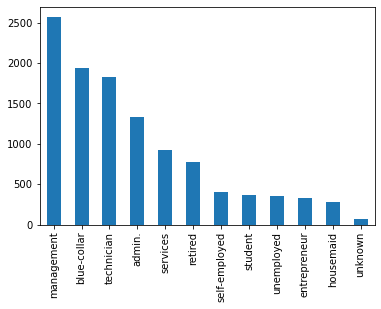

In [9]:
banks["job"].value_counts().plot(kind="bar")

In [10]:
banks["job"].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [11]:
banks.shape

(11162, 17)

In [12]:
banks["job"]=banks["job"].replace(["management", "admin."], "White-collar")
banks["job"]=banks["job"].replace(["services", "housemaid"], "Pink-collar")
banks["job"]=banks["job"].replace(["retired", "student", "unemployed", "unknown"], "Others")
banks["job"]=banks["job"].replace(["self-employed", "entrepreneur"], "self-depend")

In [13]:
banks["job"].value_counts()

White-collar    3900
blue-collar     1944
technician      1823
Others          1565
Pink-collar     1197
self-depend      733
Name: job, dtype: int64

In [14]:
banks["marital"].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [15]:
banks["education"].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [16]:
banks["default"].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [17]:
banks["contact"].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [18]:
banks.drop( columns=["contact"], inplace=True)

In [19]:
banks.drop( columns=["month", "day"], inplace=True)

In [20]:
banks["poutcome"].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [21]:
banks["poutcome"]=banks["poutcome"].replace(["unknown", "other"], "others")

In [22]:
banks["poutcome"].value_counts()

others     8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [23]:
# banks["recent_pdays"]=1/banks["pdays"]

In [24]:
banks.loc[banks["pdays"]==-1,"pdays"]=9999
banks["recent_pdays"]=1/banks["pdays"]
banks.drop(columns=["pdays"], inplace=True)

In [25]:
banks

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,deposit,recent_pdays
0,59,White-collar,married,secondary,no,2343,yes,no,1042,1,0,others,yes,0.000100
1,56,White-collar,married,secondary,no,45,no,no,1467,1,0,others,yes,0.000100
2,41,technician,married,secondary,no,1270,yes,no,1389,1,0,others,yes,0.000100
3,55,Pink-collar,married,secondary,no,2476,yes,no,579,1,0,others,yes,0.000100
4,54,White-collar,married,tertiary,no,184,no,no,673,2,0,others,yes,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,257,1,0,others,no,0.000100
11158,39,Pink-collar,married,secondary,no,733,no,no,83,4,0,others,no,0.000100
11159,32,technician,single,secondary,no,29,no,no,156,2,0,others,no,0.000100
11160,43,technician,married,secondary,no,0,no,yes,9,2,5,failure,no,0.005814


In [26]:
banks["deposit_cat"]=banks["deposit"].map({"yes":1, "no":0})

banks.drop(columns=["deposit"], inplace=True)
banks

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,recent_pdays,deposit_cat
0,59,White-collar,married,secondary,no,2343,yes,no,1042,1,0,others,0.000100,1
1,56,White-collar,married,secondary,no,45,no,no,1467,1,0,others,0.000100,1
2,41,technician,married,secondary,no,1270,yes,no,1389,1,0,others,0.000100,1
3,55,Pink-collar,married,secondary,no,2476,yes,no,579,1,0,others,0.000100,1
4,54,White-collar,married,tertiary,no,184,no,no,673,2,0,others,0.000100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,257,1,0,others,0.000100,0
11158,39,Pink-collar,married,secondary,no,733,no,no,83,4,0,others,0.000100,0
11159,32,technician,single,secondary,no,29,no,no,156,2,0,others,0.000100,0
11160,43,technician,married,secondary,no,0,no,yes,9,2,5,failure,0.005814,0


In [27]:
banks.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,recent_pdays,deposit_cat
0,59,White-collar,married,secondary,no,2343,yes,no,1042,1,0,others,0.0001,1
1,56,White-collar,married,secondary,no,45,no,no,1467,1,0,others,0.0001,1
2,41,technician,married,secondary,no,1270,yes,no,1389,1,0,others,0.0001,1
3,55,Pink-collar,married,secondary,no,2476,yes,no,579,1,0,others,0.0001,1
4,54,White-collar,married,tertiary,no,184,no,no,673,2,0,others,0.0001,1


<AxesSubplot:xlabel='age', ylabel='balance'>

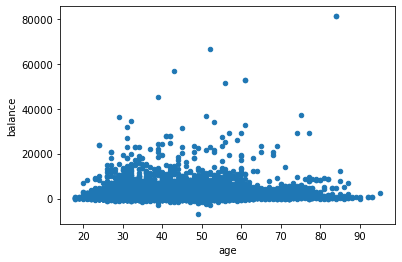

In [28]:
banks.plot(kind="scatter",x='age', y="balance")

<AxesSubplot:xlabel='age', ylabel='duration'>

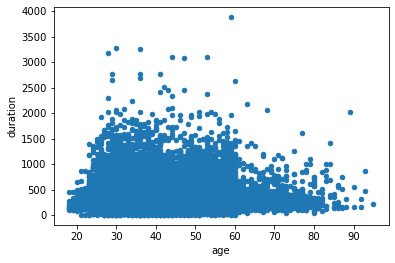

In [29]:
banks.plot(kind="scatter",x='age', y="duration")

In [30]:
# banks.plot(kind="bar",x='education', y=)

In [31]:
bank1=pd.get_dummies(banks, columns=["job", "marital","education", "default", "housing","loan", "poutcome"],
              drop_first=True)

In [32]:
# final_data=pd.conact([num, dummy], axis=1)

In [33]:
bank1.shape

(11162, 22)

In [34]:
bank1.columns

Index(['age', 'balance', 'duration', 'campaign', 'previous', 'recent_pdays',
       'deposit_cat', 'job_Pink-collar', 'job_White-collar', 'job_blue-collar',
       'job_self-depend', 'job_technician', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'poutcome_others', 'poutcome_success'],
      dtype='object')

In [35]:
# 42-11-2

In [36]:
cr=bank1.corr()

In [40]:
bank1.to_csv("bank_xgb.csv")  

In [37]:
cr.to_csv("corr.csv")

In [38]:
X=bank1.drop(columns=["deposit_cat"])
y=bank1["deposit_cat"]

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [40]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=88)

In [41]:
dt1=DecisionTreeClassifier(random_state=88)
dt1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=88)

In [42]:
print("Train score :", dt1.score(X_train, y_train))
print("Test score :", dt1.score(X_test, y_test))

Train score : 1.0
Test score : 0.7371249440214958


In [43]:
X.shape

(11162, 21)

In [44]:
y.sum()

5289

In [45]:
5289/11162

0.4738398136534671

In [46]:
# max_depth, min_sample_split, min_sample_leaf, 

In [47]:
# - criterion='gini',/ "entropy"
# splitter='best',
# - max_depth=None,
# - min_samples_split=2, 
# - min_samples_leaf=1, 
# min_weight_fraction_leaf=0.0,
# max_features=None, 
# - random_state=None, 
# max_leaf_nodes=None, 
# min_impurity_decrease=0.0, 
# min_impurity_split=None,
# class_weight=None, 
# presort='deprecated', 
# ccp_alpha=0.0

In [48]:
# 1'0 10%
# 0's 90%

In [49]:
# help(dt1)

In [50]:
dt2=DecisionTreeClassifier(max_depth=9)
dt2.fit(X_train, y_train)
print("Train score :", dt2.score(X_train, y_train))
print("Test score :", dt2.score(X_test, y_test))

Train score : 0.836599843207526
Test score : 0.8074339453649798


In [51]:
dt2=DecisionTreeClassifier(min_samples_leaf=15)
dt2.fit(X_train, y_train)
print("Train score :", dt2.score(X_train, y_train))
print("Test score :", dt2.score(X_test, y_test))

Train score : 0.8388397356926868
Test score : 0.8096730855351545


In [52]:
dt2=DecisionTreeClassifier(min_samples_split=100)
dt2.fit(X_train, y_train)
print("Train score :", dt2.score(X_train, y_train))
print("Test score :", dt2.score(X_test, y_test))

Train score : 0.8323440474857207
Test score : 0.8163905060456784


In [53]:
dt2=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=100, min_samples_leaf=15)
dt2.fit(X_train, y_train)
print("Train score :", dt2.score(X_train, y_train))
print("Test score :", dt2.score(X_test, y_test))

Train score : 0.8148728861014671
Test score : 0.8168383340797134


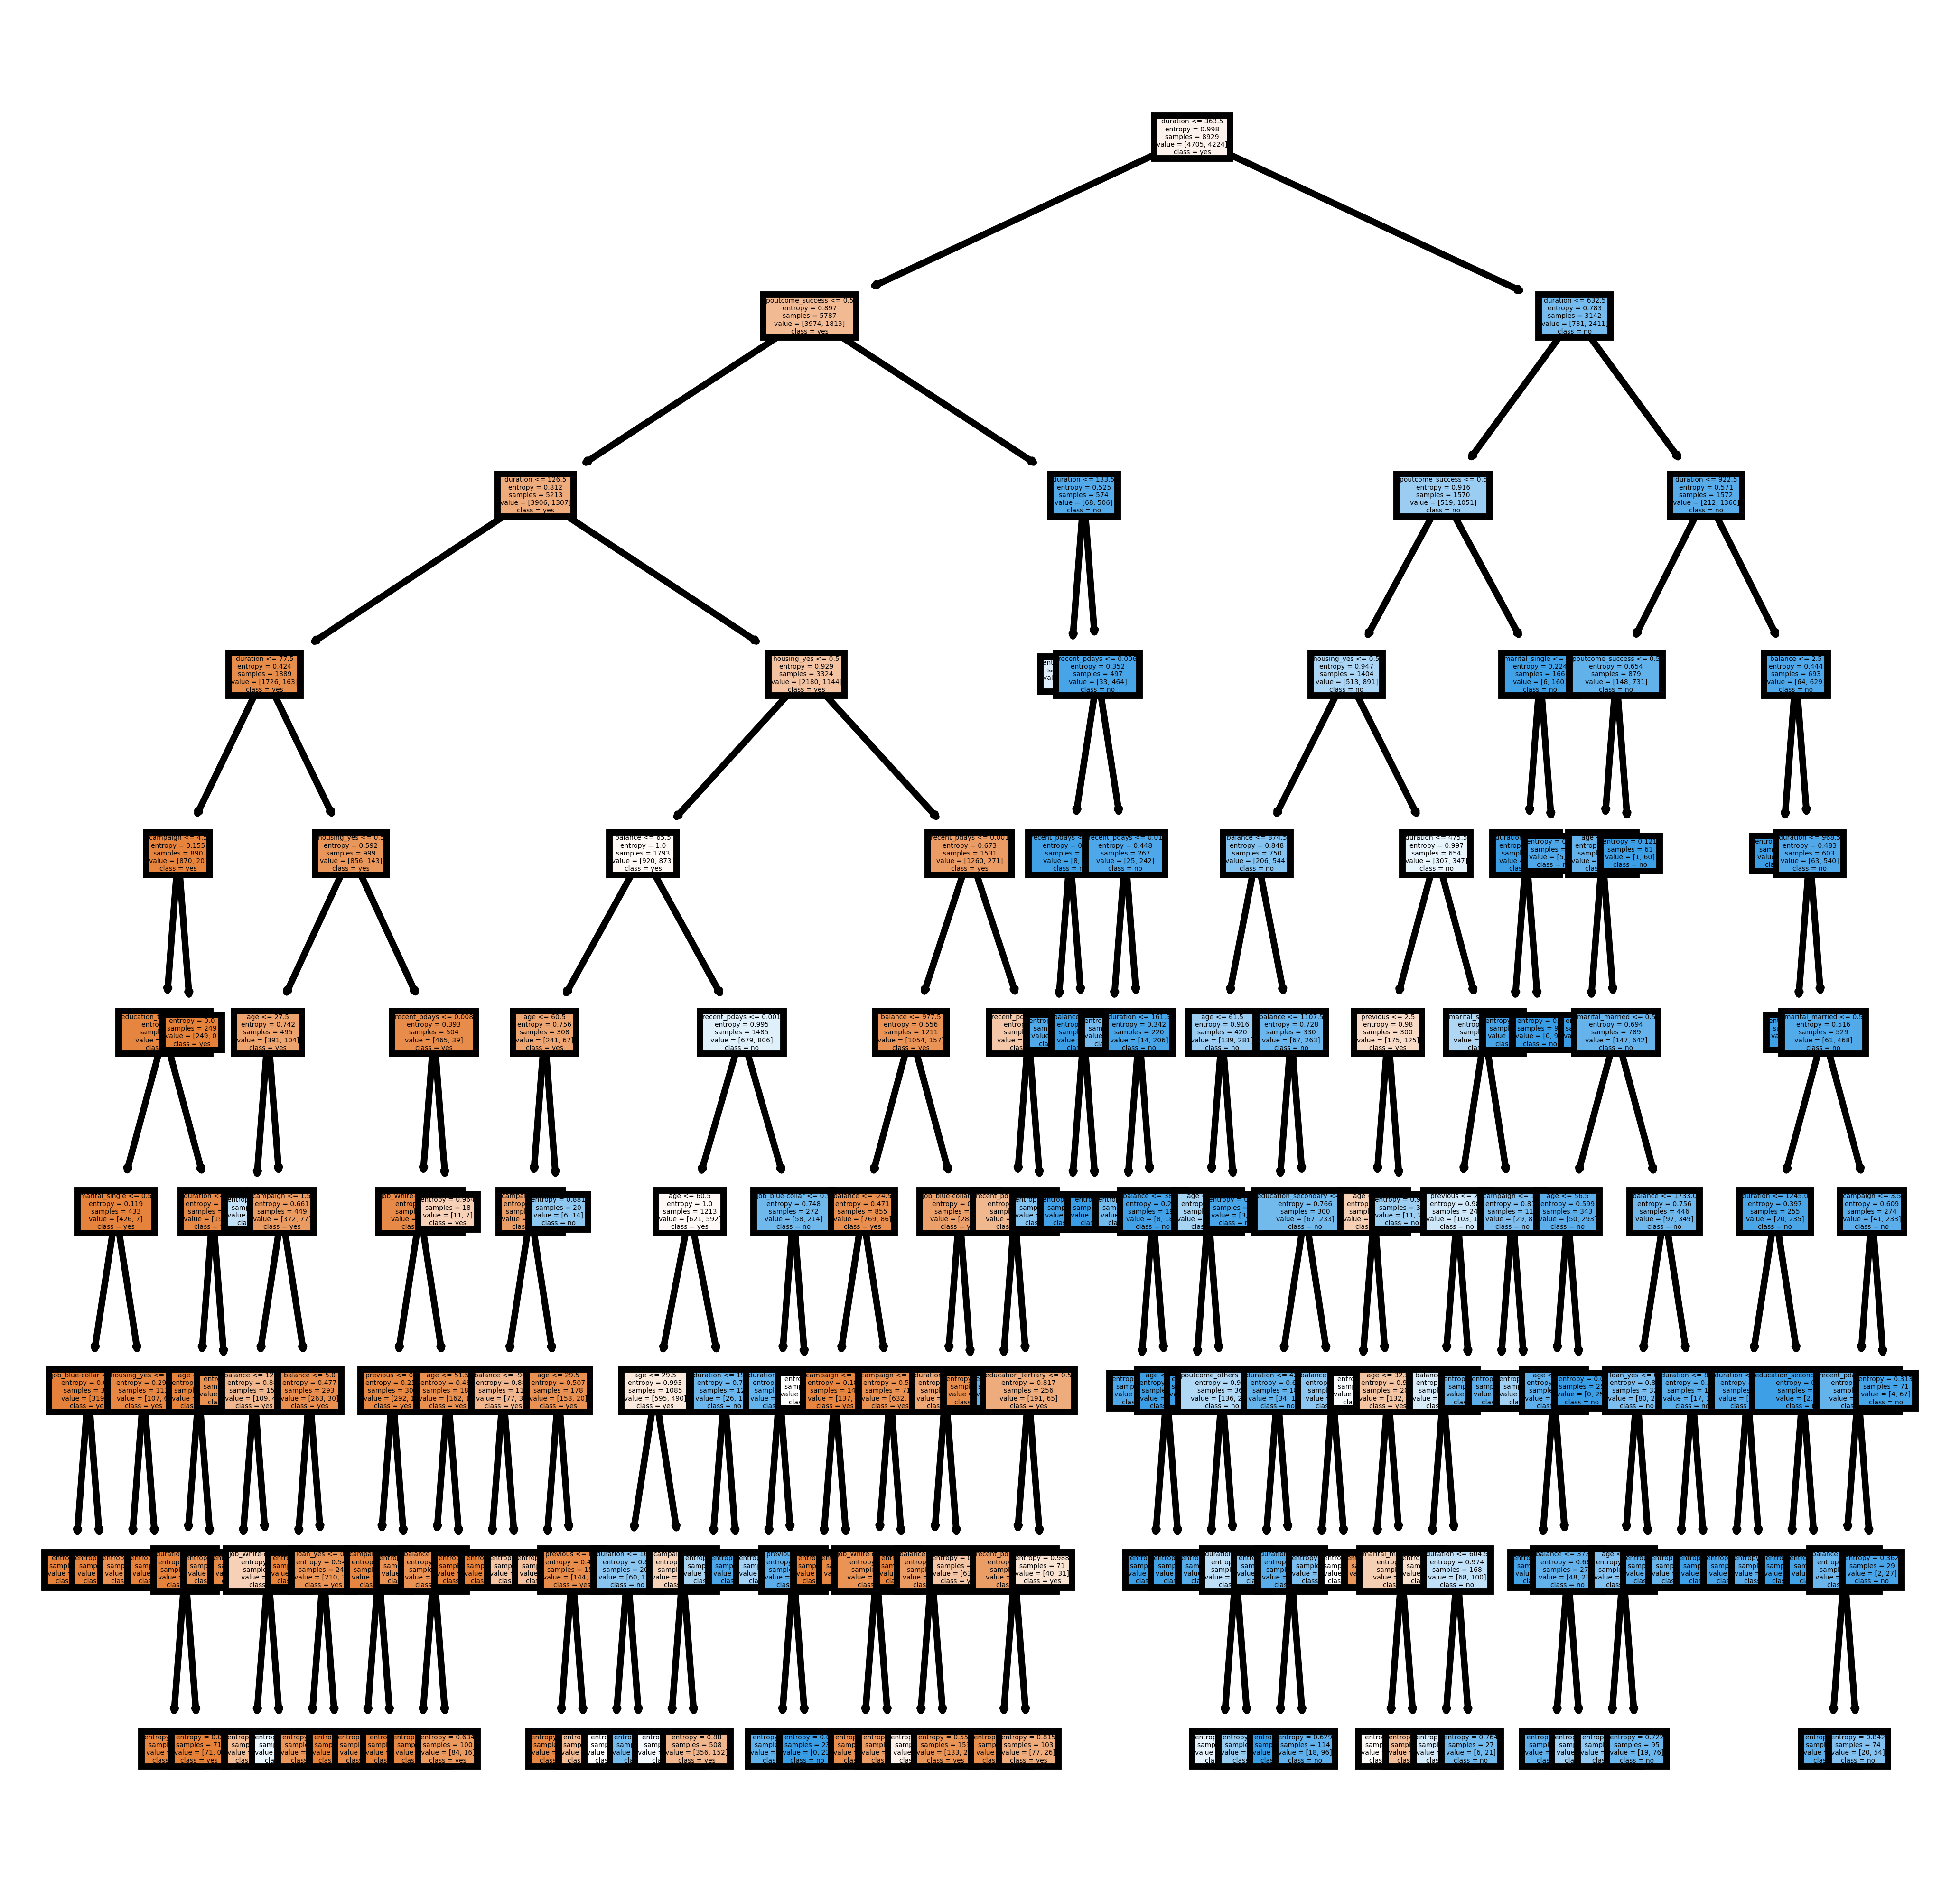

In [54]:
from sklearn.tree import plot_tree
from sklearn import tree
fn=X_train.columns
cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=1000)

dt_plot=plot_tree(dt2,
           feature_names = fn, 
           class_names=cn,
           filled = True);

In [55]:
# dt_plot.savefig("dt_plot.pdf")

In [56]:
rules=tree.export_text(dt1, feature_names=X_train.columns.to_list())

In [57]:
print(rules)

|--- duration <= 363.50
|   |--- poutcome_success <= 0.50
|   |   |--- duration <= 139.50
|   |   |   |--- duration <= 77.50
|   |   |   |   |--- age <= 70.00
|   |   |   |   |   |--- marital_married <= 0.50
|   |   |   |   |   |   |--- duration <= 62.50
|   |   |   |   |   |   |   |--- balance <= 10300.50
|   |   |   |   |   |   |   |   |--- age <= 23.50
|   |   |   |   |   |   |   |   |   |--- balance <= 627.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- balance >  627.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- age >  23.50
|   |   |   |   |   |   |   |   |   |--- age <= 57.50
|   |   |   |   |   |   |   |   |   |   |--- campaign <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- campaign >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- age >  57.50

In [58]:
dt1=DecisionTreeClassifier(max_depth=5)
dt1.fit(X_train, y_train)
print("Train accuracy:", dt1.score(X_train,y_train))

print("Test accuracy:", dt1.score(X_test,y_test))

Train accuracy: 0.7932579236196663
Test accuracy: 0.8074339453649798


In [59]:
dt1=DecisionTreeClassifier(max_depth=11, criterion="entropy")
dt1.fit(X_train, y_train)
print("Train accuracy:", dt1.score(X_train,y_train))

print("Test accuracy:", dt1.score(X_test,y_test))

Train accuracy: 0.8606786874230037
Test accuracy: 0.7962382445141066


In [60]:
# Grid Search Method 

In [61]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[2,4,6,8,9,10,11,12],
              "min_samples_leaf":[2,5,10]
             }


tr = DecisionTreeClassifier()

gsearch = GridSearchCV(tr, parameters, cv=10, verbose=1, n_jobs=-1)
gsearch.fit(X_train, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 1512 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:   27.7s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=1)

In [62]:
gsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 3}

In [63]:
gsearch.best_score_

0.7954989981871959

In [64]:
# dt3=DecisionTreeClassifier(max_depth=8, criterion="entropy", 
#                            min_samples_split=2,
#                           min_samples_leaf= 5)
# gsearch.fit(X_train, y_train)

print("Train accuracy:", gsearch.score(X_train,y_train))

print("Test accuracy:", gsearch.score(X_test,y_test))


Train accuracy: 0.8199126441930787
Test accuracy: 0.8145991939095387


In [65]:
# ?GridSearchCV

In [66]:
dt3=DecisionTreeClassifier(max_depth=8, criterion="entropy", 
                           min_samples_split=2,
                          min_samples_leaf= 5)
dt3.fit(X_train, y_train)

print("Train accuracy:", dt3.score(X_train,y_train))

print("Test accuracy:", dt3.score(X_test,y_test))

Train accuracy: 0.8199126441930787
Test accuracy: 0.8145991939095387


In [67]:
dt3.feature_importances_

array([0.05803782, 0.05388423, 0.50905495, 0.01966163, 0.00411469,
       0.05836277, 0.        , 0.        , 0.00358944, 0.        ,
       0.        , 0.00306715, 0.006993  , 0.00088213, 0.0062104 ,
       0.0009609 , 0.        , 0.08628001, 0.        , 0.001844  ,
       0.18705689])

In [68]:
imp_feat=pd.DataFrame({"columns":X_train.columns, "imp":dt3.feature_importances_}).sort_values(by="imp", ascending=False)

In [69]:
# imp_feat.to_csv("imp_features.csv")

In [70]:
X_train1=X_train[['duration','poutcome_success','housing_yes','age','recent_pdays','balance','campaign','marital_single','previous','education_tertiary']]
X_test1=X_test[['duration','poutcome_success','housing_yes','age','recent_pdays','balance','campaign','marital_single','previous','education_tertiary']]

In [71]:
dt4=DecisionTreeClassifier(max_depth=8, criterion="entropy", 
                           min_samples_split=2,
                          min_samples_leaf= 5)
dt4.fit(X_train1, y_train)

print("Train accuracy:", dt4.score(X_train1,y_train))

print("Test accuracy:", dt4.score(X_test1,y_test))

Train accuracy: 0.8195766603203046
Test accuracy: 0.8154948499776086


In [72]:
# X_test1.columns

In [74]:
# Train accuracy: 0.8198006495688207
# Test accuracy: 0.8145991939095387

### Evalution of model

In [75]:
pred_train=dt4.predict(X_train1)   # Classes , (1,0)
pred_test=dt4.predict(X_test1)

In [76]:
pred_test

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [77]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4705
           1       0.82      0.80      0.81      4224

    accuracy                           0.82      8929
   macro avg       0.82      0.82      0.82      8929
weighted avg       0.82      0.82      0.82      8929



In [78]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1168
           1       0.82      0.79      0.80      1065

    accuracy                           0.82      2233
   macro avg       0.82      0.81      0.81      2233
weighted avg       0.82      0.82      0.82      2233



In [ ]:
probs=dt4.predict_proba(X_train1)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [ ]:
metrics.roc_auc_score(y_train,probs) 

In [170]:
def profile_decile(X,y,trained_model):
    X_1=X.copy()
    y_1=y.copy()
    y_pred1=trained_model.predict(X_1)
    X_1["Prob_Event"]=trained_model.predict_proba(X_1)[:,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred1
    
    X_1["Rank"]=pd.qcut(X_1["Prob_Event"], 10, labels=np.arange(0,10,1))
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")
    
    profile=pd.DataFrame(X_1.groupby("Decile") \
                        .apply(lambda x: pd.Series({
        'min_score'   : x["Prob_Event"].min(),
        'max_score'   : x["Prob_Event"].max(),
        'Event'       : x["Y_actual"].sum(),
        'Non_event'   : x["Y_actual"].count()-x["Y_actual"].sum(),
        'Total'       : x["Y_actual"].count() })))
    return profile

In [172]:
# p_train=profile_decile(X_train,y_train,dt3)

In [65]:
p_test=profile_decile(X_test,y_test,dt3)

## RandomForest

In [79]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=88)

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf1=RandomForestClassifier()
rf1.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
print("Train score ", rf1.score(X_train, y_train))
print("Test Score", rf1.score(X_test, y_test))

Train score  1.0
Test Score 0.8275862068965517


In [83]:
# help(rf1)

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  

In [95]:
import time 
st=time.time()

rf2=RandomForestClassifier(n_estimators=50, random_state=88, max_depth=8)
rf2.fit(X_train, y_train)
print("Train score ", rf2.score(X_train, y_train))
print("Test Score", rf2.score(X_test, y_test))
et=time.time()
print("total time", et-st)

Train score  0.8296561765035279
Test Score 0.8293775190326914
total time 0.810208797454834


In [ ]:
n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

### Hyperparameter tuning

In [93]:
?GridSearchCV

In [101]:
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators" : [100, 150, 200],
            "criterion": ["gini", "entropy"],
            "max_depth" :[5, 7,9,11],
#             "min_samples_split":[4,6,10],
#             "min_samples_leaf" :[4,6,10],
            "max_features" :["log", "sqrt"],
            "bootstrap" : [True, False]
           }
rf=RandomForestClassifier()
rf_gs=GridSearchCV(estimator=rf,param_grid=parameters,scoring="accuracy", verbose=1, n_jobs=-1, cv=10)
rf_gs.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  3.5min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 11],
                         'max_features': ['log', 'sqrt'],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=1)

In [102]:
rf_gs.best_params_ 

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [105]:
import time 
st=time.time()
rf3=RandomForestClassifier(n_estimators=200, criterion="gini", max_depth=10, max_features="sqrt", bootstrap=True)
rf3.fit(X_train, y_train)
print("Train score ", rf3.score(X_train, y_train))
print("Test Score", rf3.score(X_test, y_test))
et=time.time()
print("total time", et-st)

Train score  0.855302945458618
Test Score 0.8365427675772503
total time 3.369588851928711


In [106]:
# AUc, ROC, Recall, Precision, F1Score  etc 

In [ ]:
p Prob Score 

In [ ]:
rf3.predict()
rf3.predict_proba()

In [94]:
4*2*5*4*4*2*2*10

25600

In [98]:
((25600*.81)/60)/60

5.760000000000001